### **Chapter 02. 데이터 확인하기**

In [1]:
import pandas as pd

dust = pd.read_excel("(Dataset) Lecture 12 - 환경 관련 데이터/dust.xlsx")
dust.head(3)

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0


In [2]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [3]:
dust.describe()

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,725.000000,739.000000
mean,0.003654,0.563243,0.014154,0.030422,33.325517,21.833559
std,0.000628,0.164593,0.010689,0.014664,19.930029,12.222892
min,0.002000,0.300000,0.001000,0.006000,3.000000,3.000000
25%,0.003000,0.400000,0.003000,0.017000,20.000000,13.000000
50%,0.004000,0.500000,0.014000,0.030000,29.000000,19.000000
75%,0.004000,0.700000,0.024000,0.043000,43.000000,29.000000
max,0.006000,1.200000,0.037000,0.063000,163.000000,72.000000


In [4]:
dust.columns

Index(['날짜', '아황산가스', '일산화탄소', '오존', '이산화질소', 'PM10', 'PM2.5'], dtype='object')

In [5]:
dust.rename(columns={'날짜':'date',
                     '아황산가스':'so2', 
                     '일산화탄소':'co', 
                     '오존':'o3', 
                     '이산화질소':'no2'}, inplace=True)

dust.head(3)

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0


In [6]:
dust["date"] = dust["date"].str[0:11] # year-month-day만 추출!

dust.head(3)

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0


In [7]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    744 non-null    object 
 1   so2     740 non-null    float64
 2   co      740 non-null    float64
 3   o3      740 non-null    float64
 4   no2     740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [8]:
dust["date"] = pd.to_datetime(dust["date"])
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   so2     740 non-null    float64       
 2   co      740 non-null    float64       
 3   o3      740 non-null    float64       
 4   no2     740 non-null    float64       
 5   PM10    725 non-null    float64       
 6   PM2.5   739 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 40.8 KB


In [9]:
print(dust["date"].dt.year)
print(dust["date"].dt.month)
print(dust["date"].dt.day)

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
739    2021
740    2021
741    2021
742    2021
743    2021
Name: date, Length: 744, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
739    1
740    1
741    1
742    1
743    1
Name: date, Length: 744, dtype: int32
0       1
1       1
2       1
3       1
4       1
       ..
739    31
740    31
741    31
742    31
743    31
Name: date, Length: 744, dtype: int32


In [10]:
dust.head(3)

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0


In [11]:
dust["year"] = dust["date"].dt.year
dust["month"] = dust["date"].dt.month
dust["day"] = dust["date"].dt.day

dust.head(3)

,date,so2,co,o3,no2,PM10,PM2.5,year,month,day
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0,2021,1,1
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0,2021,1,1
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0,2021,1,1


In [12]:
dust.columns

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

In [13]:
dust = dust[['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5']]

dust.head(3)

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0


In [14]:
# Not Available --> NA --> 결측값
dust.isna().sum()

date      0
year      0
month     0
day       0
so2       4
co        4
o3        4
no2       4
PM10     19
PM2.5     5
dtype: int64

In [15]:
dust.head()
# NaN --> Not a Number --> 결측값

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,NaN,14.0


In [16]:
# dust.dropna()

# 패딩(padding) --> "pad" --> NAN이 있었던 행의 바로 앞 행의 값으로 채움!
# front + fill --> "ffill"
# back + fill --> "bfill"
dust = dust.fillna(method="pad") # "pad" <-- 기본값이 "ffill"

dust.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17428\1376247097.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust = dust.fillna(method="pad") # "pad" <-- 기본값이 "ffill"


,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [17]:
dust = dust.fillna(method="bfill") # "backfill" or "bfill"

dust.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17428\3301697547.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust = dust.fillna(method="bfill") # "backfill" or "bfill"


,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [18]:
r'''
경고 의미

C:\Users\user\AppData\Local\Temp\ipykernel_17432\1376247097.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust = dust.fillna(method="pad") # "pad" <-- 기본값이 "ffill"

C:\Users\user\AppData\Local\Temp\ipykernel_17432\3301697547.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust = dust.fillna(method="bfill") # "backfill" or "bfill"
'''

# (X) dust.fillna(method="pad")
'''
앞으로는 아래의 방식을 사용해야 함(내년 즈음...?)
'''
# (O) dust.ffill()
# (O) dust.bfill()

dust.isna().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

In [19]:
weather = pd.read_excel("(Dataset) Lecture 12 - 환경 관련 데이터/weather.xlsx")
weather

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4
...,...,...,...,...,...,...,...
738,400,강남,2021-01-31 19:00:00,7.4,0.6,0.0,51.0
739,400,강남,2021-01-31 20:00:00,6.5,1.0,0.0,59.4
740,400,강남,2021-01-31 21:00:00,7.7,1.0,0.0,60.3
741,400,강남,2021-01-31 22:00:00,6.8,0.6,0.0,63.7


In [20]:
weather.info() # 2021-01-31 24:00:00은 2월로 봐서 row의 개수가 743

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


In [21]:
weather.drop(["지점", "지점명"], axis=1, inplace=True)

weather.head(3)

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0


In [22]:
weather.columns

Index(['일시', '기온(°C)', '풍속(m/s)', '강수량(mm)', '습도(%)'], dtype='object')

In [23]:
weather.columns = ["date", "temp", "wind", "rain", "humid"]
weather.head(3)

,date,temp,wind,rain,humid
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0


In [24]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


In [25]:
weather["date"] = weather["date"].dt.date
weather.head(3)

,date,temp,wind,rain,humid
0,2021-01-01,-7.2,0.6,0.0,57.5
1,2021-01-01,-7.6,0.7,0.0,57.5
2,2021-01-01,-8.2,0.6,0.0,62.0


In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    743 non-null    object 
 1   temp    743 non-null    float64
 2   wind    743 non-null    float64
 3   rain    743 non-null    float64
 4   humid   743 non-null    float64
dtypes: float64(4), object(1)
memory usage: 29.2+ KB


In [27]:
weather["date"] = pd.to_datetime(weather["date"])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


### **Chapter 03. 데이터 병합**

In [28]:
# 행의 개수가 다르다!
print(dust.shape) # 2021-01-31 24:00:00 저장됨!
print(weather.shape) # 2021-01-31 24:00:00 저장 안 됨!

(744, 10)
(743, 5)


In [29]:
dust.tail(3)

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
741,2021-01-31,2021,1,31,0.003,1.0,0.001,0.061,46.0,26.0
742,2021-01-31,2021,1,31,0.003,0.6,0.006,0.049,45.0,24.0
743,2021-01-31,2021,1,31,0.003,0.7,0.005,0.054,40.0,19.0


In [30]:
dust.drop(index=743, axis=0, inplace=True)
dust.tail(3)

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
740,2021-01-31,2021,1,31,0.004,0.8,0.001,0.059,48.0,27.0
741,2021-01-31,2021,1,31,0.003,1.0,0.001,0.061,46.0,26.0
742,2021-01-31,2021,1,31,0.003,0.6,0.006,0.049,45.0,24.0


In [31]:
df = pd.merge(dust, weather, on="date")
df.head(3)

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.2,0.6,0.0,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.6,0.7,0.0,57.5
2,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.2,0.6,0.0,62.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17808 entries, 0 to 17807
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17808 non-null  datetime64[ns]
 1   year    17808 non-null  int32         
 2   month   17808 non-null  int32         
 3   day     17808 non-null  int32         
 4   so2     17808 non-null  float64       
 5   co      17808 non-null  float64       
 6   o3      17808 non-null  float64       
 7   no2     17808 non-null  float64       
 8   PM10    17808 non-null  float64       
 9   PM2.5   17808 non-null  float64       
 10  temp    17808 non-null  float64       
 11  wind    17808 non-null  float64       
 12  rain    17808 non-null  float64       
 13  humid   17808 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int32(3)
memory usage: 1.7 MB


In [33]:
df.shape

(17808, 14)

### **Chapter 04. 데이터 분석 및 시각화**

In [34]:
df.corr() # 문자열이 있으면 drop 시키고 corr()해야 함

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036,0.491312,-0.074944,0.026872,0.176721
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036,0.491312,-0.074944,0.026872,0.176721
so2,-0.318239,NaN,NaN,-0.318239,1.000000,0.141117,-0.068687,0.085989,0.160874,0.147571,-0.375131,0.031460,-0.019894,-0.096445
co,0.226099,NaN,NaN,0.226099,0.141117,1.000000,-0.756706,0.841594,0.529720,0.692664,0.318052,-0.322431,0.077886,0.338083
o3,-0.118081,NaN,NaN,-0.118081,-0.068687,-0.756706,1.000000,-0.924362,-0.348229,-0.525078,-0.203804,0.355105,-0.097039,-0.288327
no2,0.206333,NaN,NaN,0.206333,0.085989,0.841594,-0.924362,1.000000,0.420554,0.566387,0.313188,-0.403745,0.110232,0.315524
PM10,0.016124,NaN,NaN,0.016124,0.160874,0.529720,-0.348229,0.420554,1.000000,0.825433,0.175430,-0.108474,0.026378,0.216753
PM2.5,0.051036,NaN,NaN,0.051036,0.147571,0.692664,-0.525078,0.566387,0.825433,1.000000,0.190698,-0.202018,0.069463,0.354713


In [35]:
corr = df.corr()
corr["PM10"]

date     0.016124
year          NaN
month         NaN
day      0.016124
so2      0.160874
co       0.529720
o3      -0.348229
no2      0.420554
PM10     1.000000
PM2.5    0.825433
temp     0.175430
wind    -0.108474
rain     0.026378
humid    0.216753
Name: PM10, dtype: float64

In [36]:
corr = df.corr()
corr["PM10"].sort_values(ascending=False) # 내림차순 정렬!

PM10     1.000000
PM2.5    0.825433
co       0.529720
no2      0.420554
humid    0.216753
temp     0.175430
so2      0.160874
rain     0.026378
date     0.016124
day      0.016124
wind    -0.108474
o3      -0.348229
year          NaN
month         NaN
Name: PM10, dtype: float64

In [37]:
corr["PM2.5"].sort_values(ascending=False)

PM2.5    1.000000
PM10     0.825433
co       0.692664
no2      0.566387
humid    0.354713
temp     0.190698
so2      0.147571
rain     0.069463
date     0.051036
day      0.051036
wind    -0.202018
o3      -0.525078
year          NaN
month         NaN
Name: PM2.5, dtype: float64

In [38]:
# corr을 볼 때는 인과관계로 보면 안 되고, 상관관계에 대해서만

<Figure size 640x480 with 0 Axes>

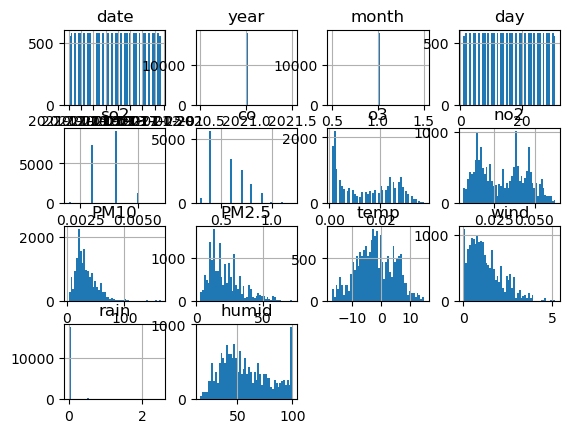

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

# histogram
df.hist(bins=50)

plt.show()

In [40]:
df.columns

Index(['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'PM10',
       'PM2.5', 'temp', 'wind', 'rain', 'humid'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

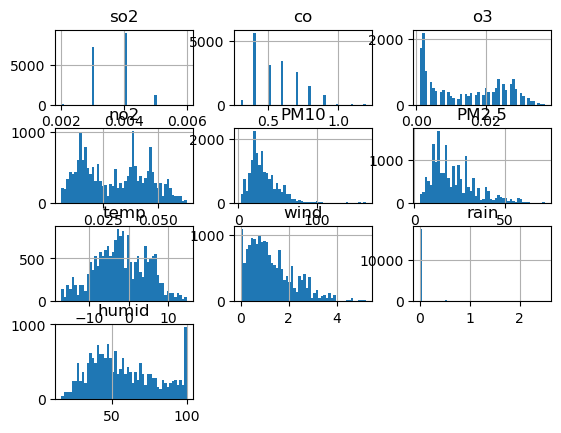

In [41]:
plt.figure()

# histogram
df[['so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'temp', 'wind', 'rain', 'humid']].hist(bins=50)

plt.show()

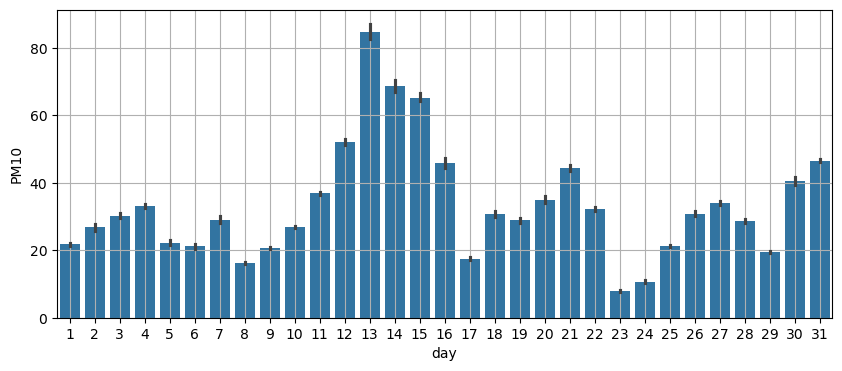

In [42]:
plt.figure(figsize=(10,4))

sns.barplot(data=df, x="day", y="PM10")

plt.grid()
plt.show()

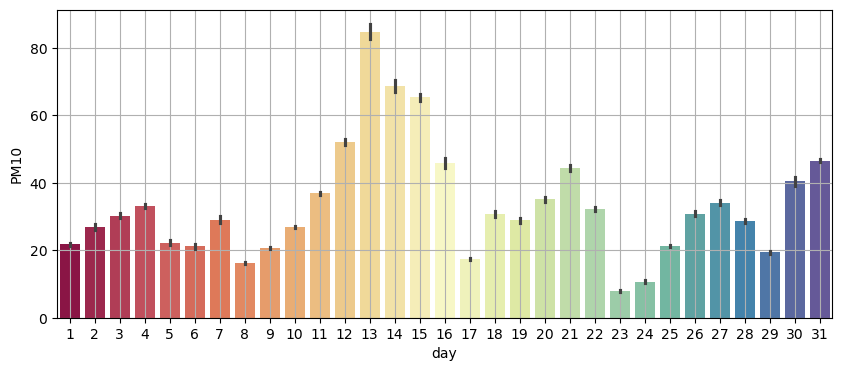

In [43]:
plt.figure(figsize=(10,4))

sns.barplot(data=df, x="day", y="PM10", hue="day", palette="Spectral", legend=False)

plt.grid()
plt.show()

In [44]:
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.2,0.6,0.0,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.6,0.7,0.0,57.5
2,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.2,0.6,0.0,62.0
3,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.1,0.5,0.0,60.5
4,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.7,1.3,0.0,66.4


In [45]:
df.corr()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036,0.491312,-0.074944,0.026872,0.176721
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036,0.491312,-0.074944,0.026872,0.176721
so2,-0.318239,NaN,NaN,-0.318239,1.000000,0.141117,-0.068687,0.085989,0.160874,0.147571,-0.375131,0.031460,-0.019894,-0.096445
co,0.226099,NaN,NaN,0.226099,0.141117,1.000000,-0.756706,0.841594,0.529720,0.692664,0.318052,-0.322431,0.077886,0.338083
o3,-0.118081,NaN,NaN,-0.118081,-0.068687,-0.756706,1.000000,-0.924362,-0.348229,-0.525078,-0.203804,0.355105,-0.097039,-0.288327
no2,0.206333,NaN,NaN,0.206333,0.085989,0.841594,-0.924362,1.000000,0.420554,0.566387,0.313188,-0.403745,0.110232,0.315524
PM10,0.016124,NaN,NaN,0.016124,0.160874,0.529720,-0.348229,0.420554,1.000000,0.825433,0.175430,-0.108474,0.026378,0.216753
PM2.5,0.051036,NaN,NaN,0.051036,0.147571,0.692664,-0.525078,0.566387,0.825433,1.000000,0.190698,-0.202018,0.069463,0.354713


In [46]:
corr = df.drop(["date", "year", "month", "day"], axis=1).corr()
corr

,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
so2,1.000000,0.141117,-0.068687,0.085989,0.160874,0.147571,-0.375131,0.031460,-0.019894,-0.096445
co,0.141117,1.000000,-0.756706,0.841594,0.529720,0.692664,0.318052,-0.322431,0.077886,0.338083
o3,-0.068687,-0.756706,1.000000,-0.924362,-0.348229,-0.525078,-0.203804,0.355105,-0.097039,-0.288327
no2,0.085989,0.841594,-0.924362,1.000000,0.420554,0.566387,0.313188,-0.403745,0.110232,0.315524
PM10,0.160874,0.529720,-0.348229,0.420554,1.000000,0.825433,0.175430,-0.108474,0.026378,0.216753
PM2.5,0.147571,0.692664,-0.525078,0.566387,0.825433,1.000000,0.190698,-0.202018,0.069463,0.354713
temp,-0.375131,0.318052,-0.203804,0.313188,0.175430,0.190698,1.000000,-0.211112,0.077955,0.213428
wind,0.031460,-0.322431,0.355105,-0.403745,-0.108474,-0.202018,-0.211112,1.000000,-0.078174,-0.461900
rain,-0.019894,0.077886,-0.097039,0.110232,0.026378,0.069463,0.077955,-0.078174,1.000000,0.284686
humid,-0.096445,0.338083,-0.288327,0.315524,0.216753,0.354713,0.213428,-0.461900,0.284686,1.000000


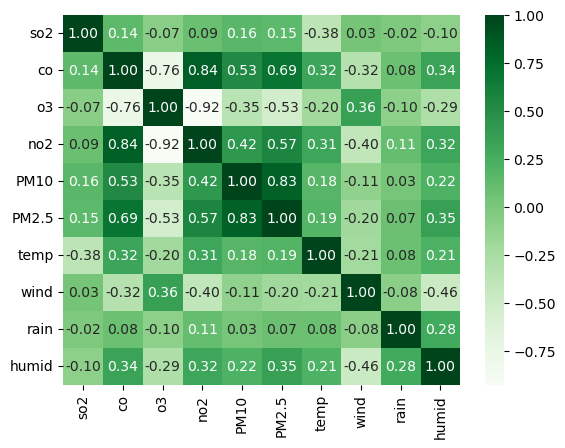

In [47]:
plt.figure()

sns.heatmap(data = corr, annot=True, cmap="Greens", fmt=".2f") # format

plt.show()

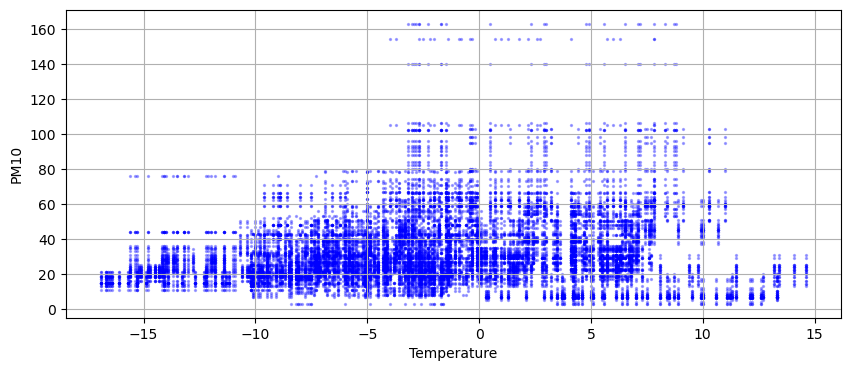

In [48]:
plt.figure(figsize=(10, 4))

plt.scatter(df["temp"], df["PM10"], c="blue", s=2, alpha=0.3)

plt.xlabel("Temperature")
plt.ylabel("PM10")
plt.grid()
plt.show()

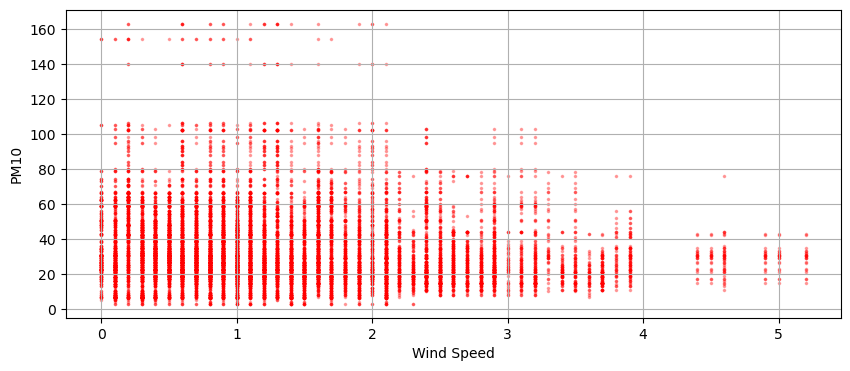

In [49]:
plt.figure(figsize=(10, 4))

plt.scatter(df["wind"], df["PM10"], c="red", s=2.5, alpha=0.3)

plt.xlabel("Wind Speed")
plt.ylabel("PM10")
plt.grid()
plt.show()

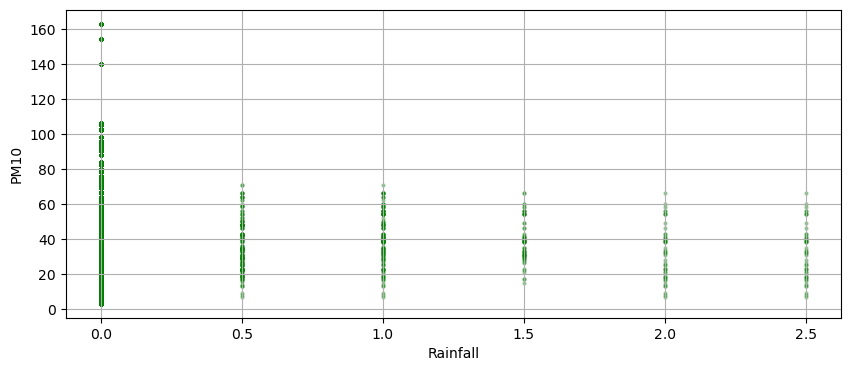

In [50]:
plt.figure(figsize=(10, 4))

plt.scatter(df["rain"], df["PM10"], c="green", s=4.5, alpha=0.3)

plt.xlabel("Rainfall")
plt.ylabel("PM10")
plt.grid()
plt.show()

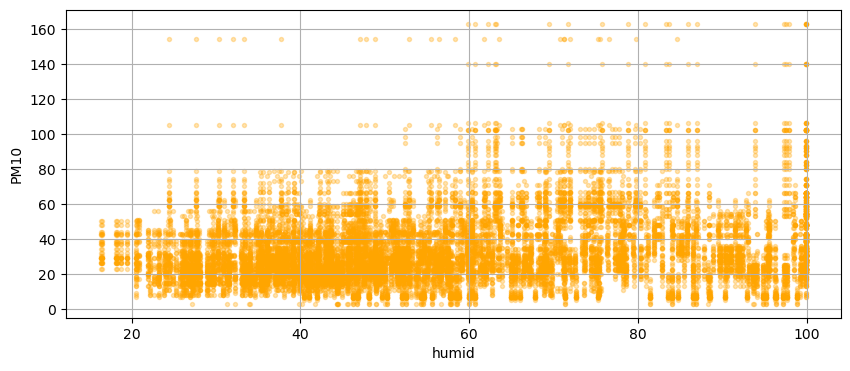

In [51]:
plt.figure(figsize=(10, 4))

plt.scatter(df["humid"], df["PM10"], c="orange", s=8.5, alpha=0.3)

plt.xlabel("humid")
plt.ylabel("PM10")
plt.grid()
plt.show()

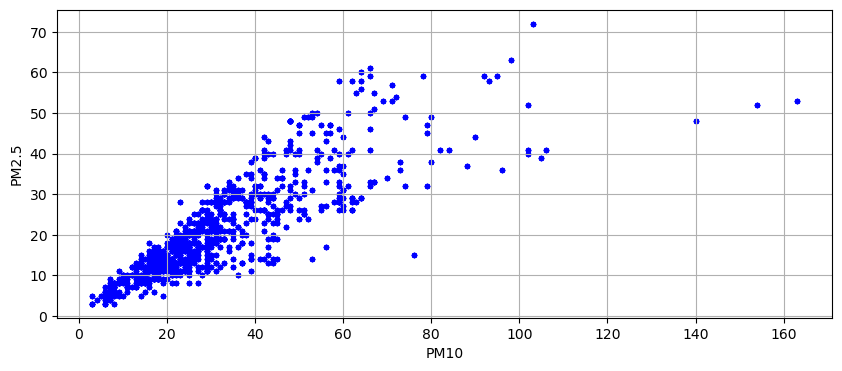

In [52]:
plt.figure(figsize=(10, 4))

plt.scatter(df["PM10"], df["PM2.5"], c="blue", s=8, alpha=0.3)

plt.xlabel("PM10")
plt.ylabel("PM2.5")
plt.grid()
plt.show()